In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [13]:
train_df = pd.read_csv('data/train.csv')
# print train_df

# test_df = pd.read_csv('data/test.csv')
# print  test_df

In [14]:
train_df.shape

(1460, 81)

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# train_df = train_df.dropna()

In [12]:
train_df.shape

(0, 81)

In [29]:
train_df[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean()

,MSZoning,SalePrice
0,C (all),74528.000000
1,FV,214014.061538
2,RH,131558.375000
3,RL,191004.994787
4,RM,126316.830275


In [15]:
train_df['MSZoning'] = train_df['MSZoning'].replace(['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], [0, 1, 2, 3, 4, 5, 6, 7])

In [16]:
train_df['MSZoning'].unique()

array([5, 7, 1, 2, 4])

In [17]:
train, test = train_test_split(train_df, test_size=0.2)

In [18]:
exp_reg101 = setup(data=train, target='SalePrice', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1168, 81)"
4,Missing Values,True
5,Numeric Features,19
6,Categorical Features,60
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
compare_models()

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:59:56
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,1.645942e+04,1.076374e+09,2.916449e+04,8.382000e-01,0.1401,9.610000e-02
1,Orthogonal Matching Pursuit,1.729289e+04,1.248542e+09,3.064544e+04,8.121000e-01,0.1464,1.025000e-01
2,Lasso Regression,1.967396e+04,1.513279e+09,3.398108e+04,7.694000e-01,0.2219,1.210000e-01
3,Ridge Regression,1.993825e+04,1.581768e+09,3.548074e+04,7.631000e-01,0.2050,1.186000e-01
4,Elastic Net,2.085578e+04,1.775674e+09,3.686705e+04,7.452000e-01,0.1660,1.206000e-01
5,Bayesian Ridge,2.488338e+04,2.186304e+09,4.231420e+04,6.804000e-01,0.1952,1.421000e-01
6,Passive Aggressive Regressor,5.379574e+04,6.211296e+09,7.297396e+04,-1.670000e-02,0.5166,3.066000e-01
7,Random Sample Consensus,4.364248e+08,9.367493e+18,1.516936e+09,-1.985732e+09,1.4919,3.004404e+03
8,Linear Regression,6.419973e+08,1.815368e+19,2.966534e+09,-2.272100e+09,2.4436,4.969187e+03
9,Least Angle Regression,2.608375e+37,5.578554e+77,2.361896e+38,-1.081878e+68,24.9018,1.903940e+32


KeyboardInterrupt: 

In [21]:
llar = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17134.9408,6.793533e+08,26064.4076,0.8647,0.1712,0.1224
1,15382.8736,4.820716e+08,21956.1295,0.9026,0.1196,0.0902
2,15557.1788,4.882824e+08,22097.1127,0.9047,0.1065,0.0837
3,18914.0695,9.880370e+08,31433.0552,0.8670,0.1367,0.1027
4,21803.2549,5.330282e+09,73008.7809,0.2696,0.2068,0.1253
5,15696.2423,3.953731e+08,19883.9899,0.9245,0.1401,0.1074
6,14889.7252,4.813507e+08,21939.7064,0.9066,0.1321,0.0933
7,15505.3560,6.255660e+08,25011.3177,0.9169,0.1035,0.0778
8,13019.0445,4.492645e+08,21195.8598,0.9008,0.1175,0.0779
9,16691.5494,8.441636e+08,29054.4942,0.9247,0.1672,0.0802


In [22]:
print(llar)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)


In [23]:
tuned_llar = tune_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16224.7271,6.367256e+08,25233.4232,0.8732,0.1617,0.1131
1,14816.2677,4.915559e+08,22171.0591,0.9007,0.1233,0.0883
2,15097.3213,4.567612e+08,21371.9712,0.9108,0.1062,0.0825
3,18584.1964,8.594104e+08,29315.7027,0.8844,0.1336,0.1024
4,21321.4048,5.640060e+09,75100.3317,0.2271,0.2113,0.1248
5,12253.0195,2.679250e+08,16368.4140,0.9488,0.1110,0.0813
6,15066.2946,4.911920e+08,22162.8523,0.9047,0.1465,0.0954
7,15255.3544,6.041549e+08,24579.5635,0.9197,0.1032,0.0776
8,12941.5374,4.494770e+08,21200.8725,0.9008,0.1170,0.0773
9,16962.2312,9.565053e+08,30927.4199,0.9147,0.1162,0.0781


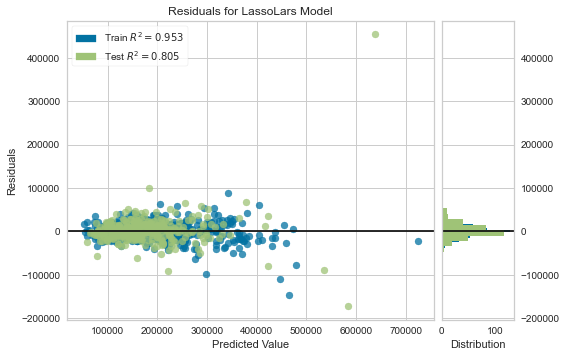

In [24]:
plot_model(tuned_llar)

In [25]:
evaluate_model(tuned_llar)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(tuned_llar)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Lars,16453.7638,1.114775e+09,33388.2522,0.8054,0.1445,0.1005


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,YrSold_month_1,YrSold_weekday_0,YrSold_weekday_1,YrSold_weekday_3,YrSold_weekday_4,YrSold_weekday_6,YrSold_is_month_end_0,YrSold_is_month_start_1,SalePrice,Label
0,11.0,70.000000,11200.0,1965.0,1965.0,0.0,906.0,0.0,134.0,1040.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,129500,134722.7524
1,1401.0,50.000000,6000.0,1929.0,1950.0,0.0,0.0,0.0,862.0,862.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,120000,117808.8637
2,109.0,85.000000,8500.0,1919.0,2005.0,0.0,0.0,0.0,793.0,793.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,115000,116291.5873
3,1396.0,88.000000,12665.0,2005.0,2006.0,245.0,0.0,0.0,1094.0,1094.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,281213,283141.5993
4,1184.0,60.000000,10800.0,1920.0,1950.0,0.0,821.0,0.0,299.0,1120.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,120000,147815.6542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,58.0,89.000000,11645.0,2004.0,2004.0,0.0,0.0,0.0,860.0,860.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,196500,188596.4794
347,938.0,75.000000,9675.0,2005.0,2005.0,0.0,341.0,0.0,772.0,1113.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,253000,227759.6798
348,63.0,44.000000,6442.0,2006.0,2006.0,178.0,24.0,0.0,1346.0,1370.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,202500,213863.4680
349,1271.0,69.630817,23595.0,1979.0,1979.0,0.0,1258.0,0.0,74.0,1332.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,260000,207455.1040


In [27]:
final_llar = finalize_model(tuned_llar)

In [28]:
new_prediction = predict_model(final_llar, data=test)

In [29]:
new_prediction.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,489,190,5,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000,151389.6378
1,1112,60,5,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,205000,189217.4052
2,666,60,5,106.0,11194,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,230500,224290.7217
3,21,60,5,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,338890.7307
4,1172,20,5,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,1400,11,2008,WD,Normal,163000,136924.3712


In [30]:
save_model(final_llar,'model')

Transformation Pipeline and Model Succesfully Saved


In [31]:
saved_final_llar = load_model('model')

Transformation Pipeline and Model Sucessfully Loaded
